In [19]:
import matplotlib.pyplot as plt
import numpy as np


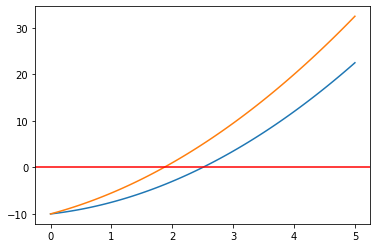

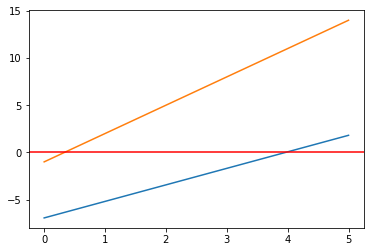

In [20]:
def f1(x1,x2):
    return (x1*x1+x1*x2-10.)

def f2(x1,x2):
    return (x2+3*x1*x2*x2-57)

x1list = np.linspace(0, 5, 101)
x2list = np.linspace(0, 5, 101)

f1test = f1(x1list, x2list[30])
plt.plot(x1list, f1test)
f1test = f1(x1list, x2list[70])
plt.plot(x1list, f1test)
plt.axhline(y = 0, c = "r")
plt.show()

f1test = f1(x1list[35], x2list)
plt.plot(x1list, f1test)
f1test = f1(x1list[60], x2list)
plt.plot(x1list, f1test)
plt.axhline(y = 0, c = "r")
plt.show()

In [21]:
def f1x1(x1,x2):
    dx = 1.e-6
    return (f1(x1+dx/2., x2) - f1(x1-dx/2., x2))/dx

def f1x2(x1,x2):
    dx = 1.e-6
    return (f1(x1, x2+dx/2.) - f1(x1, x2-dx/2.))/dx
    
def f2x1(x1,x2):
    dx = 1.e-6
    return (f2(x1+dx/2., x2) - f2(x1-dx/2., x2))/dx
    
def f2x2(x1,x2):
    dx = 1.e-6
    return (f2(x1, x2+dx/2.) - f2(x1, x2-dx/2.))/dx
    
def dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    return (f1x2(x1,x2)*f2(x1,x2) - f2x2(x1,x2)*f1(x1,x2))/(f1x1(x1,x2)*f2x2(x1,x2) - f2x1(x1,x2)*f1x2(x1,x2))

def dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    return (f2x1(x1,x2)*f1(x1,x2) - f1x1(x1,x2)*f2(x1,x2))/(f1x1(x1,x2)*f2x2(x1,x2) - f2x1(x1,x2)*f1x2(x1,x2))


In [22]:
#initial guess 
x1 = 0.1
x2 = 4.2

NMAX = 100
eps = 1e-8
for i in range(NMAX):
    x1 = x1 + dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    x2 = x2 + dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    if abs(f1(x1,x2))<eps and abs(f2(x1,x2))<eps:
        print("after ", i, "iterations")
        print(x1, x2)
        print(f1(x1, x2), f2(x1, x2))
        break

after  4 iterations
2.0000000000000733 3.0000000000000013
5.151434834260726e-13 2.0250467969162855e-12


In [23]:
def f1x1(x1,x2):
    return 2*x1+x2

def f1x2(x1,x2):
    return x1
    
def f2x1(x1,x2):
    return 3*x2*x2
    
def f2x2(x1,x2):
    return 1.+6.*x1*x2
    
def dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    return (f1x2(x1,x2)*f2(x1,x2) - f2x2(x1,x2)*f1(x1,x2))/(f1x1(x1,x2)*f2x2(x1,x2) - f2x1(x1,x2)*f1x2(x1,x2))

def dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    return (f2x1(x1,x2)*f1(x1,x2) - f1x1(x1,x2)*f2(x1,x2))/(f1x1(x1,x2)*f2x2(x1,x2) - f2x1(x1,x2)*f1x2(x1,x2))

In [24]:
#initial guess 
x1 = 0.1
x2 = 4.2

NMAX = 100
eps = 1e-8
for i in range(NMAX):
    x1 = x1 + dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    x2 = x2 + dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    if abs(f1(x1,x2))<eps and abs(f2(x1,x2))<eps:
        print("after ", i, "iterations")
        print(x1, x2)
        print(f1(x1, x2), f2(x1, x2))
        break

after  4 iterations
2.0000000000000733 3.0000000000000013
5.151434834260726e-13 2.0250467969162855e-12


In [25]:
def f1x1(x1,x2):
    dx = 1.e-6
    return (f1(x1+dx/2., x2) - f1(x1-dx/2., x2))/dx

def f1x2(x1,x2):
    dx = 1.e-6
    return (f1(x1, x2+dx/2.) - f1(x1, x2-dx/2.))/dx
    
def f2x1(x1,x2):
    dx = 1.e-6
    return (f2(x1+dx/2., x2) - f2(x1-dx/2., x2))/dx
    
def f2x2(x1,x2):
    dx = 1.e-6
    return (f2(x1, x2+dx/2.) - f2(x1, x2-dx/2.))/dx

def Jacobin(x1, x2):
    return np.array([[f1x1(x1,x2), f1x2(x1,x2)],
                     [f2x1(x1,x2), f2x2(x1,x2)]])

In [26]:
#initial guess 
x = np.array([0.1, 4.2])

NMAX = 100
eps = 1e-8
for i in range(NMAX):
    A = Jacobin(x1, x2)
    y = np.array([-f1(x[0], x[1]), -f2(x[0], x[1])])
    x = x + np.linalg.solve(A, y)
    if abs(f1(x[0], x[1]))<eps and abs(f2(x[0], x[1]))<eps:
        print("after ", i, "iterations")
        print(x)
        print(f1(x[0], x[1]), f2(x[0], x[1]))
        break

after  4 iterations
[2. 3.]
3.1102231901058985e-11 3.723314989656501e-10
